# VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX #

El primer paso del proyecto se basa en realizar un anális de conglomerados donde apoyados por los profesores tendremos acceso a una base de datos con información de bienes inmuebles de las diferentes alcaldías de la CDMX. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. DEFINICIÓN DEL PROBLEMA

En 2023 el INEGI informó que la acitivad económica del primer subsector;renta de bienes inmuebles, generó alrededor de 9.7 millones de empleos en México, equivalente al 11% de la PEA y de 2005 a 2019 aportó entre el 6% y 11% del PIB anual.  
Ante el creciente desarrollo del mercado y el uso de nuevas tecnologías, el CEO de Erich Zann y Asociados (destacada compañía inmobiliaria en CDMX) pide al gerente de Mercadotecnia renovar los procedimientos y tecnologías necesarias para determinar el valor de venta de los bienes raíces que su negocio ofrece en la ciudad.  
Se realizarán cambions en la estartegia de promoción y venta de los inmuebles para destacar el hecho que la empresa utiliza métodos analíticos para identificar las variables clave que determinan el precio de un inmueble.

# 2. DEFINICIÓN DE VARIABLES.

In [34]:
#Damos un primer vistazo a nuestro df
df = pd.read_excel("RetoConglomerados.xlsx")
df.head()

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,Si,No,No,Si,Si,150.0,2.0,3,2,6500.0
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,51.0,1.0,2,1,1200.0
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,Si,No,No,Si,Si,305.0,3.0,3,3,17500.0
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,42.0,1.0,2,1,1046.4
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,No,No,No,No,No,50.0,1.0,2,1,1195.0


In [35]:
# Realizaremos una inspección para verificar datos fuera de rango.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [36]:
# Verificamos que los valores categóricos estén clasificados adecuadamente.
from funpymodeling.exploratory import freq_tbl

freq_tbl(df)


                  Alcaldia  frequency  percentage  cumulative_perc
0               Iztapalapa         94    0.142857         0.142857
1           Alvaro Obregon         91    0.138298         0.281155
2                  Tlahuac         82    0.124620         0.405775
3        Gustavo A. Madero         79    0.120061         0.525836
4                 Coyoacan         45    0.068389         0.594225
5           Miguel Hidalgo         38    0.057751         0.651976
6      Venustiano Carranza         33    0.050152         0.702128
7             Azcapotzalco         30    0.045593         0.747720
8                  Tlalpan         29    0.044073         0.791793
9                Cuahtemoc         27    0.041033         0.832827
10           Benito Juárez         26    0.039514         0.872340
11              Xochimilco         24    0.036474         0.908815
12              Cuajimalpa         23    0.034954         0.943769
13  La Magdalena Contreras         19    0.028875         0.97

In [37]:
df["Cocina_equip"]=df["Cocina_equip"].replace("Si ","Si")
df["Gimnasio"]=df["Gimnasio"].replace("Si ","Si")
df["Gimnasio"]=df["Gimnasio"].replace("No ","No")
df["Amueblado"]=df["Amueblado"].replace("Si ","Si")
df["Amueblado"]=df["Amueblado"].replace("No ","No")
df["Alberca"]=df["Alberca"].replace("si ","Si")
df["Alberca"]=df["Alberca"].replace("Si ","Si")
df["Alberca"]=df["Alberca"].replace("No ","No")
df["Terraza"]=df["Terraza"].replace("Si ","Si")
df["Terraza"]=df["Terraza"].replace("No ","No")
df["Elevador"]=df["Elevador"].replace("Si ","Si")
df["Elevador"]=df["Elevador"].replace("si","Si")
df["Lugares_estac"]=df["Lugares_estac"].replace("Si",1)


In [38]:
# Hacemos una seguna revisión.
## No se si esta es la mejor manera de hacer este tipo de limpieza, agradecería una opinión al respecto.
from funpymodeling.exploratory import freq_tbl

freq_tbl(df)

                  Alcaldia  frequency  percentage  cumulative_perc
0               Iztapalapa         94    0.142857         0.142857
1           Alvaro Obregon         91    0.138298         0.281155
2                  Tlahuac         82    0.124620         0.405775
3        Gustavo A. Madero         79    0.120061         0.525836
4                 Coyoacan         45    0.068389         0.594225
5           Miguel Hidalgo         38    0.057751         0.651976
6      Venustiano Carranza         33    0.050152         0.702128
7             Azcapotzalco         30    0.045593         0.747720
8                  Tlalpan         29    0.044073         0.791793
9                Cuahtemoc         27    0.041033         0.832827
10           Benito Juárez         26    0.039514         0.872340
11              Xochimilco         24    0.036474         0.908815
12              Cuajimalpa         23    0.034954         0.943769
13  La Magdalena Contreras         19    0.028875         0.97

<Figure size 1500x800 with 0 Axes>

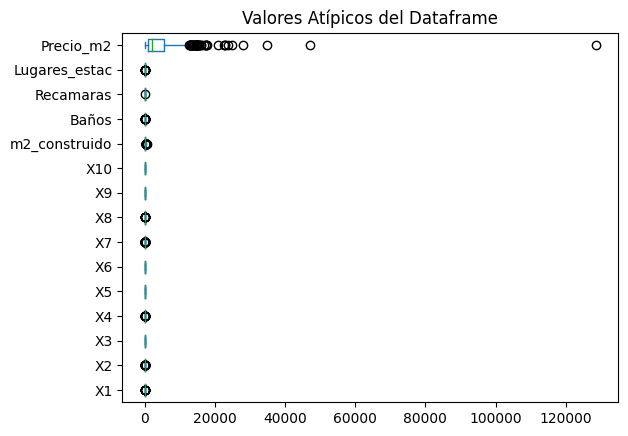

In [39]:
#Cercas Tukey 
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

Tenemos un valor mayor a 120,000 en la variable "Precio_m2", se decide que para realizar un análisis mas adecuado tendremos que eliminar este valor fuera de rango.

In [40]:
df = df[(df["Precio_m2"]< 120000)]

<Figure size 1500x800 with 0 Axes>

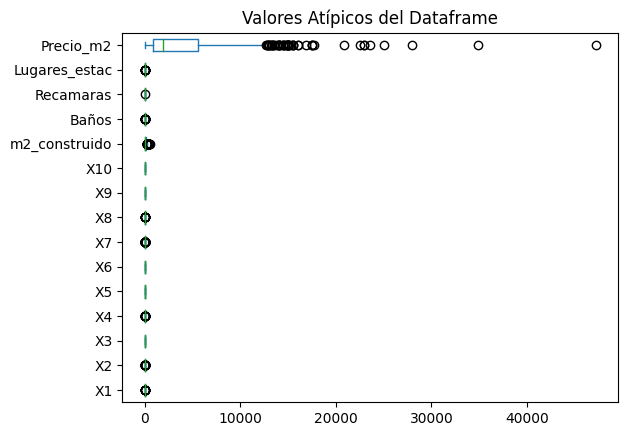

In [41]:
#Cercas Tukey 
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

**Una vez realizada la limpieza de los datos procedemos a seleccionar las variables que mejor describiran el análisis.**
1. Elección de la ubicación. En esta sección me parece que la variable que mejor describe esta categoría es "Precio_m2", el precio del inmueble está directamente ligado con la ubicación.  
2. Variables escenciales. Hace referencia a los requerimentos que necesita una vivienda para vivir cómodamente, ejemplo de esto es "m2_construido".


#### Análisis decriptivo de los datos.

In [42]:
# Elección del conglomerado
Conglomerado = df.iloc[ : , [18,22]]
Conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 657
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   m2_construido  657 non-null    float64
 1   Precio_m2      657 non-null    float64
dtypes: float64(2)
memory usage: 15.4 KB


In [43]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,1.356513,5.370481,42.342553,17.239131,26.249567,3.394977,1.021112,0.076063,7.826289,40.169049,103.338280,1.684170,2.316591,1.407915,4094.677207
std,0.483573,0.657517,4.919433,4.172756,3.971662,1.623444,2.094066,0.057201,1.996663,11.000246,76.023027,0.839403,0.576667,0.821471,5007.717845
min,0.351538,3.813899,31.695907,6.071809,18.457227,0.476854,0.025017,0.019992,3.169090,15.149627,34.000000,1.000000,1.000000,0.000000,1.250000
25%,0.962086,4.983509,40.214709,15.501421,23.737688,1.831782,0.109803,0.030823,6.224294,35.219705,58.000000,1.000000,2.000000,1.000000,860.657000
50%,1.399838,5.622805,42.852474,18.205065,25.421478,3.189615,0.295210,0.048857,8.154877,39.647755,72.000000,1.000000,2.000000,1.000000,1918.080000
75%,1.550909,5.683630,46.562121,20.048451,28.245291,4.541026,0.705162,0.096289,9.555907,50.081349,120.000000,2.000000,3.000000,2.000000,5524.000000
max,2.799421,6.775809,51.229514,23.456157,32.202925,8.532998,10.209771,0.227029,13.059364,63.969239,500.000000,5.000000,5.000000,5.000000,47200.000000


# 3. METODOLOGÍA SIMILITUD O DISTANCIA.

Utilizamos la distancia euclidiana, la cual busca calcular la similitud de la distancia entre los datos.

In [44]:
# Dejamos el código declarado solo de manera representativa.

#Código utilizado de la clase "Análisis de conglomerados".
#Código realizado con la ayuda de ChatGPT
# Función para calcular la distancia euclidiana entre dos filas
#def euclidean_distance(row1, row2):
    #return np.sqrt(np.sum((row1 - row2) ** 2))

# Crear una matriz de distancias euclidianas
#distances = np.zeros((len(Conglomerado), len(Conglomerado)))

#for i in range(len(Conglomerado)):
    #for j in range(i, len(Conglomerado)):
       # dist = euclidean_distance(Conglomerado.iloc[i], Conglomerado.iloc[j])
       # distances[i, j] = dist
       # distances[j, i] = dist  # La matriz es simétrica, por lo que llenamos ambos lados

# Crear un DataFrame de distancias
#distance_clusters = pd.DataFrame(distances, index=Conglomerado.index, columns=Conglomerado.index)

#distance_clusters #ahora contiene las distancias euclidianas entre todas las filas de tu DataFrame

# 4. PROCEDIMIENTO DE AGRUPAMIENTO.

En este caso decidimos realizar el procedimiento k-means ya que catalogamos la naturaleza de la información para realizar un análisis no jerárquico, los principales componentes se enfocan en:
- No realizamos una estructura de clustering jerárquicas.
- Dividiremos cada punto de datos en grupos sin considerar la existencia de clusters dentro de otros clusters.

# 5. DECIDIR NÚMERO DE CONGLOMERADOS.

Para esta técnica utilizaremos la metodología del codo, además, nos apoyaremos en una segunda opinión llevando a cabo un gráfico dendograma.

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

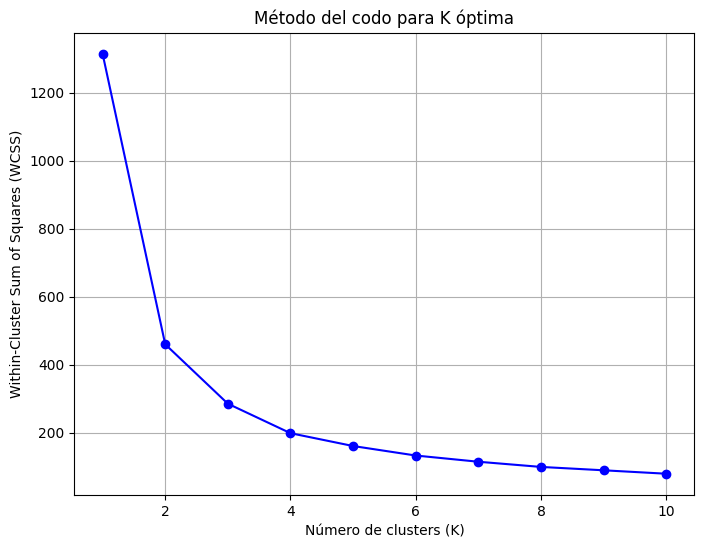

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Se estandarizan los valores
scaler = StandardScaler()
X = scaler.fit_transform(Conglomerado)

# Se calcula el wcss (Suma de cuadrados de las distancias intra-cluster)
# se almacena el valor en la lista wcss
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Se grafica la curva.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método del codo para K óptima')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

La técnica del codo define que el número ideal de clusters (donde existe la mayor homogeneidad internamnete y mayor diferencia entre clusters) es de 4.

In [46]:
#Dendograma
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Estandarización (esto afecta si no se realiza)
scaler = StandardScaler()
X_std = scaler.fit_transform(Conglomerado)

In [47]:
# se realiza el clustering con la función linkage
linked = linkage(X_std, method='ward') #como podrán observar, son las distancias

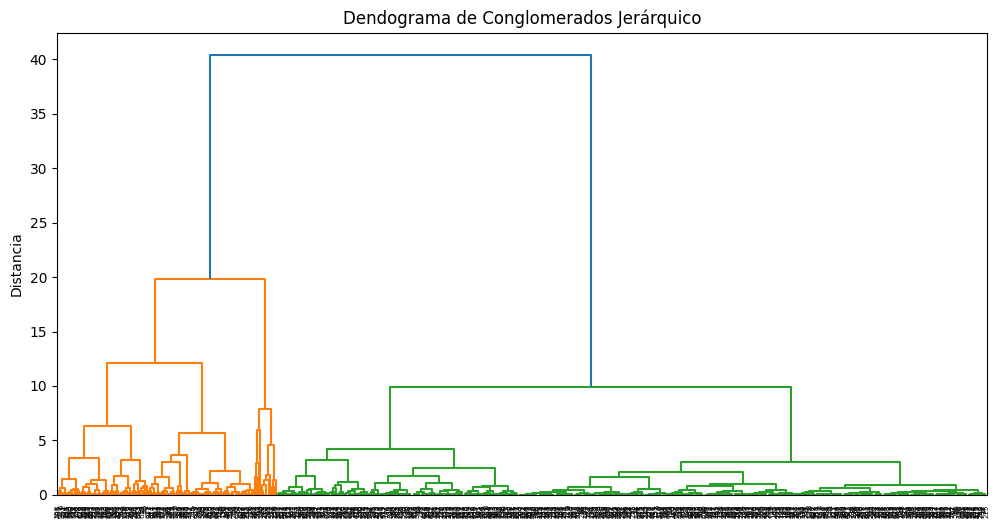

In [48]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z=linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Conglomerados Jerárquico')
plt.ylabel('Distancia')
plt.show()

# 6. INTERPRETAR Y ELABORAR UN PERFIL DE CONGLOMERADOS.

In [49]:
from sklearn.cluster import AgglomerativeClustering


clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(df[['Precio_m2','m2_construido' ]])
clustering_model.labels_

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 3, 2, 1, 2, 3, 2, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2,
       2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 3, 0, 2, 1, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 3, 3, 2, 1, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,

<Axes: xlabel='Precio_m2', ylabel='m2_construido'>

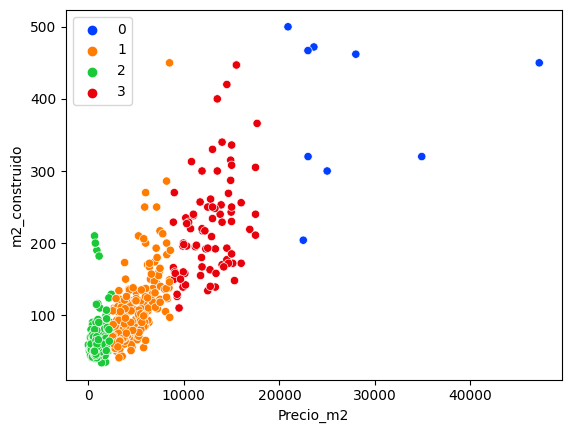

In [50]:
import seaborn as sns

data_labels = clustering_model.labels_
sns.scatterplot(x='Precio_m2',
                y='m2_construido',
                data=df,
                hue=data_labels,
                palette="bright")

### Definición de los conglomerados.  
En nuestro análisis contamos con un total de 4 perfiles de acuerdo a la compra de inmubles en la CDMX tomando en consideración las variables de "Precio_m2" y "m2_construido", la clasificación se explica a continuación.  


In [51]:
df["Cocina_equip"]=df["Cocina_equip"].replace("Si",1)
df["Cocina_equip"]=df["Cocina_equip"].replace("No",0)
df["Gimnasio"]=df["Gimnasio"].replace("Si",1)
df["Gimnasio"]=df["Gimnasio"].replace("No",0)
df["Amueblado"]=df["Amueblado"].replace("Si",1)
df["Amueblado"]=df["Amueblado"].replace("No",0)
df["Alberca"]=df["Alberca"].replace("Si",1)
df["Alberca"]=df["Alberca"].replace("No",0)
df["Terraza"]=df["Terraza"].replace("Si",1)
df["Terraza"]=df["Terraza"].replace("No",0)
df["Elevador"]=df["Elevador"].replace("Si",1)
df["Elevador"]=df["Elevador"].replace("No",0)

In [52]:
cluster_results = df.copy()
cluster_results['Cluster Labels'] = clustering_model.labels_
### Esta línea nos da el resultado de la evaluación de una condición
cluster_results['Cluster Labels'] == 3
### Podemos usar este resultado para filtrar una serie.
cluster_0 = cluster_results.loc[cluster_results['Cluster Labels'] == 0]
cluster_1 = cluster_results.loc[cluster_results['Cluster Labels'] == 1]
cluster_2 = cluster_results.loc[cluster_results['Cluster Labels'] == 2]
cluster_3 = cluster_results.loc[cluster_results['Cluster Labels'] == 3]

**Perfil 1. DeLujo   (Cluster 0)**  
Este tipo de perfil representa a la minoría de las ocurencias ya que tiene un recuento de 9 datos, este tipo de inmueble se caracteriza por tener espacios amplios a un costo muy por encima del promedio, cuenta con 3 baños y medio y un aproximado de 3 recámaras ,además de contar con el espacio suficiente para estacionar al menos 3 vehículos, el costo por m2 del inmueble ronda un precio de $27,566 en comparación a $657 del promedio de la ciudad.

In [53]:
# Análisis decriptivo del perfil 1.
cluster_0.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,Cluster Labels
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.0,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.0
mean,1.115766,5.545907,39.985948,14.902188,22.152817,2.737643,0.655351,0.047382,5.657352,30.649975,...,0.111111,0.666667,1.0,0.888889,388.333333,3.5,3.222222,3.333333,27566.583333,0.0
std,0.481396,0.366130,4.409810,4.243306,3.673349,1.599597,1.233557,0.020721,1.109897,10.027515,...,0.333333,0.500000,0.0,0.333333,103.687029,1.0,0.666667,0.866025,8467.571490,0.0
min,0.611027,4.602689,35.542918,10.499484,18.457227,1.058463,0.068491,0.026194,4.497140,20.123868,...,0.000000,0.000000,1.0,0.000000,204.000000,2.0,2.000000,2.000000,20900.000000,0.0
25%,0.611027,5.569242,35.542918,10.499484,18.457227,1.058463,0.068491,0.026194,4.497140,20.123868,...,0.000000,0.000000,1.0,1.000000,320.000000,3.0,3.000000,3.000000,22990.000000,0.0
50%,1.394146,5.569242,40.261385,16.530821,24.415938,3.714119,0.428650,0.061151,6.224294,36.763288,...,0.000000,1.000000,1.0,1.000000,450.000000,3.0,3.000000,4.000000,23609.250000,0.0
75%,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,6.675828,39.647755,...,0.000000,1.000000,1.0,1.000000,467.000000,4.0,4.000000,4.000000,28000.000000,0.0
max,1.550909,5.758377,44.360119,18.897734,27.882698,4.172703,3.909596,0.077061,6.675828,39.647755,...,1.000000,1.000000,1.0,1.000000,500.000000,5.0,4.000000,4.000000,47200.000000,0.0


**Perfil 2. Familiar2 (Cluster 3)**  
Llamamos de esta forma al perfil dado que se busca comprar un bien inmueble con suficiente espacio para el desarrollo de una familia de una pareja no tan joven (mayor a 35 años) con mas de 1 hijo donde la pareja se encuentra en una posición económica buena, evitando los precios del perfil 1, dentro de secciones del hogar se encuentran de 2 a 3 baños, habitaciones o espacios de estacionamiento, el precio por m2 ronda en promedio $12,714.

In [54]:
# Análisis descriptivo del perfil 2.
cluster_3.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,Cluster Labels
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,1.129422,5.599921,40.468278,15.363328,22.455762,2.654332,0.421802,0.041994,6.061629,31.554994,...,0.0,0.511905,0.904762,0.916667,226.761905,2.821429,2.833333,2.559524,12714.964131,3.0
std,0.426183,0.235624,4.098543,3.947211,3.668410,1.322368,0.802971,0.032696,1.374147,9.457931,...,0.0,0.502860,0.295307,0.278045,76.365579,0.790161,0.556091,0.700279,2367.795715,0.0
min,0.611027,4.602689,35.542918,10.499484,18.457227,1.058463,0.068491,0.026174,4.497140,20.123868,...,0.0,0.000000,0.000000,0.000000,110.000000,2.000000,2.000000,1.000000,8900.000000,3.0
25%,0.611027,5.569242,35.542918,10.499484,18.457227,1.058463,0.068491,0.026174,4.497140,20.123868,...,0.0,0.000000,1.000000,1.000000,169.250000,2.000000,3.000000,2.000000,10650.000000,3.0
50%,1.339167,5.683630,42.852474,17.831208,23.737688,3.189615,0.282937,0.026194,6.675828,36.604039,...,0.0,1.000000,1.000000,1.000000,217.000000,3.000000,3.000000,2.500000,12784.000000,3.0
75%,1.394146,5.683630,42.852474,17.831208,24.415938,3.714119,0.428650,0.061151,6.976226,36.763288,...,0.0,1.000000,1.000000,1.000000,253.750000,3.125000,3.000000,3.000000,14667.719750,3.0
max,1.857685,5.758377,47.821312,21.693800,32.202925,4.541026,3.909596,0.167438,9.555907,50.081349,...,0.0,1.000000,1.000000,1.000000,447.000000,5.000000,5.000000,5.000000,17666.000000,3.0


**Perfil 3. Familiar1 (Cluster1)**  
Este perfil de inmueble busca llamar la atención de una familia joven (máximo 1 hijo) donde la pareja apenas logra desarrollarse en su posición laboral, en este tipo de vivienda podremos encontrar 2 habitaciones con baños integrados, tendremos espacio para estacionar de 1 a 2 vehículos y el precio por m2 se aproxima a $4909. Añadiremos que esta sección de inmuebles representa cerca del 30% de los registros.

In [55]:
# Análisis descriptivo del perfil 3.
cluster_1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,Cluster Labels
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0
mean,1.184663,5.625944,40.394116,15.086611,25.260537,2.837505,1.217187,0.056400,6.522307,33.945115,...,0.024752,0.287129,0.836634,0.806931,109.316832,2.051980,2.331683,1.683168,4909.757248,1.0
std,0.521657,0.686485,5.277826,4.781669,3.679560,1.663555,2.671221,0.051930,1.722161,10.327065,...,0.155756,0.453546,0.370618,0.395688,49.144610,0.658674,0.649444,0.718355,1767.063461,0.0
min,0.351538,3.813899,31.695907,6.071809,18.457227,0.476854,0.025017,0.019992,3.169090,15.149627,...,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000,1.000000,0.000000,2500.000000,1.0
25%,0.771834,4.983509,32.914771,10.974065,23.737688,1.695343,0.048384,0.026174,5.469807,25.714023,...,0.000000,0.000000,1.000000,1.000000,77.000000,2.000000,2.000000,1.000000,3318.057500,1.0
50%,1.339167,5.683630,42.089005,16.530821,24.551109,3.189615,0.282937,0.030823,6.976226,36.604039,...,0.000000,0.000000,1.000000,1.000000,98.000000,2.000000,2.000000,2.000000,4511.095500,1.0
75%,1.339167,6.164747,42.852474,17.831208,26.826894,3.189615,0.458097,0.047522,6.976226,36.604039,...,0.000000,1.000000,1.000000,1.000000,129.000000,2.000000,3.000000,2.000000,6200.000000,1.0
max,2.799421,6.775809,51.229514,23.456157,32.202925,8.532998,10.209771,0.227029,13.059364,63.969239,...,1.000000,1.000000,1.000000,1.000000,450.000000,5.000000,4.000000,5.000000,8585.000000,1.0


**Perfil 4. Soltero (Cluster2)**  
Este perfil idealmente va dirigido a personas solteras, las instalaciones tendrán el espacio para que 1 solo individuo pueda cubrir sus necesidades cómodamente auqnue exitirán excepeciones donde puedan encontrar más de 1 recámara o baño (dependeiendo la zona), en esta viviendo podríamos no encontrar lugar de estacionamiento por lo que el precio por m2 es en promedio de $362 (50% menor en comparación al promedio general).

In [56]:
# Análisis descriptivo del perfil 4.
cluster_2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,Cluster Labels
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,...,362.000000,362.00000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,1.511088,5.170329,43.923307,18.933631,27.783640,3.894256,1.059860,0.095654,9.017328,45.877576,...,0.022099,0.01105,0.174033,0.301105,64.276934,1.169890,2.165746,0.939227,1056.010287,2.0
std,0.415442,0.646361,4.311450,2.915792,3.325368,1.492448,1.924504,0.057421,1.384140,7.989652,...,0.147210,0.10468,0.379663,0.459373,21.424305,0.386051,0.427760,0.381944,544.488464,0.0
min,0.351538,3.813899,31.695907,6.071809,20.071382,0.476854,0.025017,0.019992,3.169090,15.149627,...,0.000000,0.00000,0.000000,0.000000,34.000000,1.000000,1.000000,0.000000,1.250000,2.0
25%,1.399838,4.495493,40.214709,18.205065,25.421478,2.923867,0.295210,0.048857,8.179167,40.700593,...,0.000000,0.00000,0.000000,0.000000,52.000000,1.000000,2.000000,1.000000,665.000000,2.0
50%,1.536913,4.985392,46.562121,20.048451,26.778072,4.541026,0.705162,0.096289,9.555907,50.081349,...,0.000000,0.00000,0.000000,0.000000,60.000000,1.000000,2.000000,1.000000,905.067000,2.0
75%,1.857685,5.622805,47.821312,21.693800,32.202925,5.035624,0.957675,0.167438,9.555907,50.081349,...,0.000000,0.00000,0.000000,1.000000,70.000000,1.000000,2.000000,1.000000,1389.250000,2.0
max,2.799421,6.374010,51.229514,23.456157,32.202925,8.532998,10.209771,0.227029,13.059364,63.969239,...,1.000000,1.00000,1.000000,1.000000,210.000000,3.000000,4.000000,3.000000,2400.000000,2.0


# 7. Representación gráfica de los conglomerados.

Realizamos una pequeña modificación en las variables categóricas para poder visualziarlas en los gráficos.

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

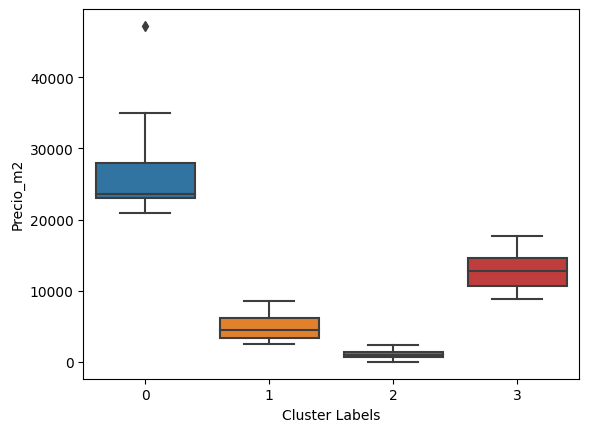

In [57]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

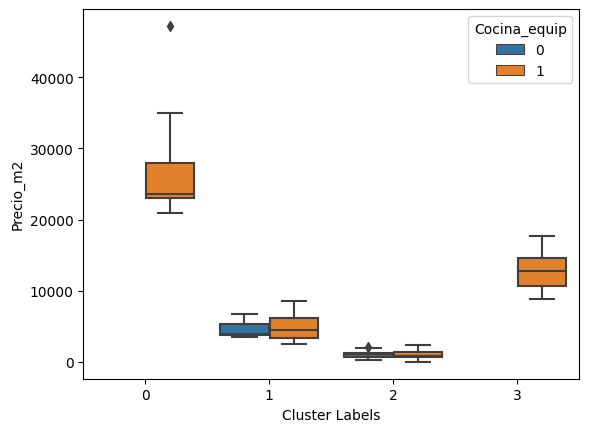

In [58]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Cocina_equip")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

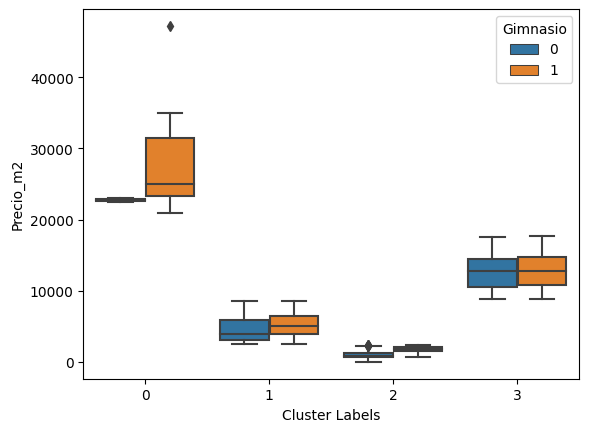

In [59]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Gimnasio")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

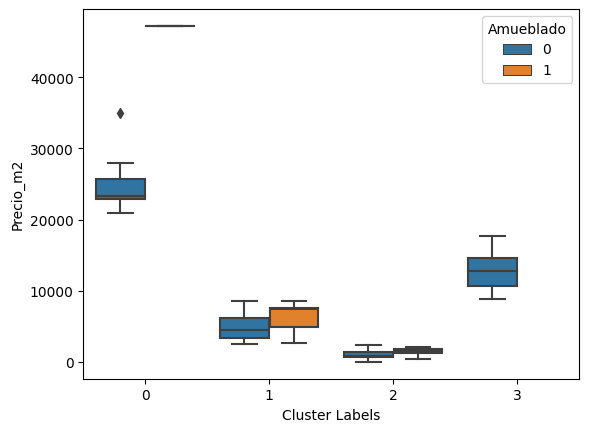

In [60]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Amueblado")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

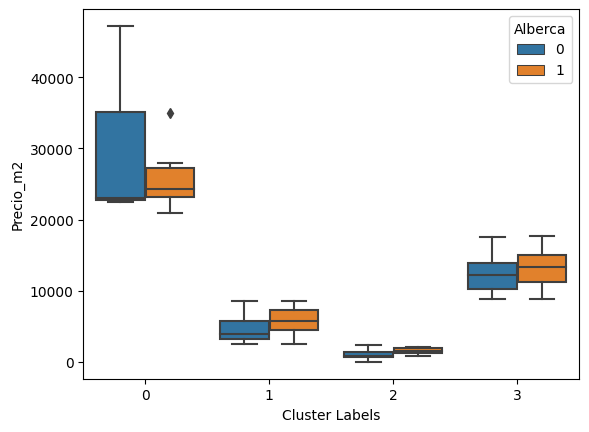

In [61]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Alberca")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

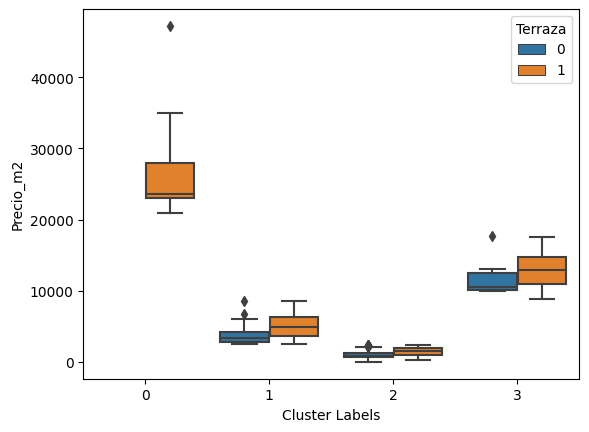

In [62]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Terraza")

<Axes: xlabel='Cluster Labels', ylabel='Precio_m2'>

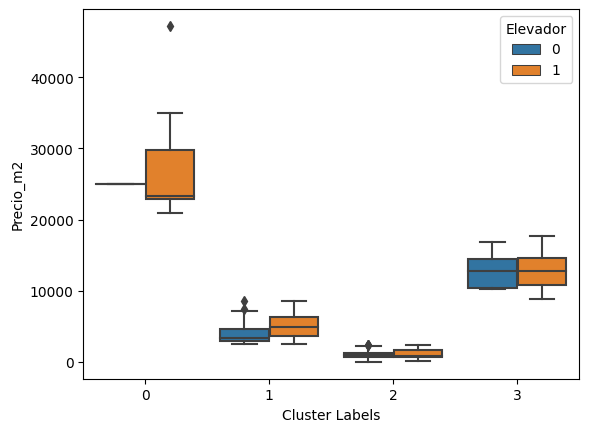

In [63]:
sns.boxplot(data=cluster_results, x="Cluster Labels", y="Precio_m2",hue="Elevador")